# В этом файле рассмотрим различные метрики для сравнения SFR и механизмов звездообразования

In [1]:
import numpy as np
import os
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
Sigma_H2 = np.load('./data/Sigma_H2.npy')
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
r_HI = np.load('./data/r_HI.npy')
dist_kpc = np.load('./data/dist_kpc_corr.npy')
Qeff_min = np.load('./data/Qeff_min.npy')
Qeff_max = np.load('./data/Qeff_max.npy')
Qg = np.load('./data/Qg.npy')


In [18]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))
shear_method = np.zeros(dist_kpc.shape)
G = 4.32
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = A * sigma_g / np.pi / G # без умножения на alpha_A
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method[i][j] = Sigma_crit[i][j] / Sigma_gas 

In [22]:
def maps(model=None, slim=None, mlim=None, cut=None):
    "Эта функция строит карты со значениями 0\1(0-устойчивость, 1-неустойчивость)"
    "model = 'Qeff_min', 'Qeff_max', 'Qg', 'shear_method', 'Sigma_HI', 'Sigma_H2'"
    "slim - предельное значение для log10(Sigma_SFR)"
    "mlim - предельное значение устойчивости для механизма ( для shear_method это значение параметра alpha)"
    "cut - True\False"
    
    model_map = np.zeros(dist_kpc.shape)
    if (model=='shear_method'):
        for i, row in enumerate(dist_kpc):
            for j, col in enumerate(dist_kpc[0]):
                if (0 < mlim * shear_method[i][j]<=1.):
                    model_map[i][j] = 1
               
    if (model=='Sigma_HI') | (model=='Sigma_H2'):
        x = np.load('./data/'+model+'.npy')
        for i, row in enumerate(dist_kpc):
            for j, col in enumerate(dist_kpc[0]):
                if (x[i][j] > mlim):
                    model_map[i][j] = 1
                    
    if (model=='Qeff_min') | (model=='Qeff_max') | (model=='Qg'):
        x = np.load('./data/'+model+'.npy')
        for i, row in enumerate(dist_kpc):
            for j, col in enumerate(dist_kpc[0]):
                if (x[i][j] < mlim):
                    model_map[i][j] = 1  
        
    SFR_map = np.zeros(dist_kpc.shape)
    for i, row in enumerate(dist_kpc):
            for j, col in enumerate(dist_kpc[0]):
                if (np.log10(Sigma_SFR[i][j]) > slim):
                     SFR_map[i][j] = 1
    
    if (cut):
        return SFR_map[60:,:], model_map[60:,:]
    else:
        return SFR_map, model_map

    
        
        

In [25]:
#Sigma_SFR_lim, Qeff_min_lim = maps(model='Qeff_min',slim=-1.75,mlim=3.,cut=True)

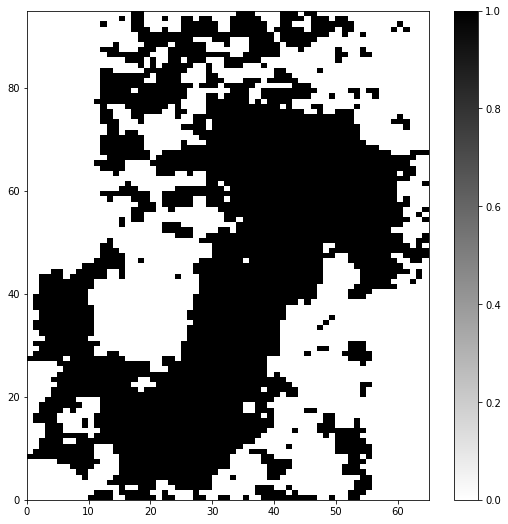

In [28]:
#X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,96,1))
#fig = plt.figure(figsize=[9,9])
#quadmesh = plt.pcolormesh(X, Y, Qeff_min_lim, cmap='gist_yarg')
#plt.colorbar()